This file contains Random Forest, K-Nearest Neighbour and Support Vector Machine ML Models.

#### Import the libraries

In [144]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from skimage.filters.rank import entropy
from skimage.filters import sobel
from skimage.morphology import disk
from scipy import ndimage as nd
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

#### Load the data and Extract the features

Here in the load_data(data_dir) function we are loading the data, resizing the data and extracting the features from HOG_Features for the train and test both the datasets.

In [145]:
def load_data(data_dir):
    features = []
    labels = []
    for folder in os.listdir(data_dir):
        label = folder
        folder_path = os.path.join(data_dir, folder)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                resized_image = cv2.resize(image, (64, 64))

                # Step 3: Extract Features (HOG Features)
                hog_features = hog(resized_image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))

                # Append features and labels
                features.append(hog_features)
                labels.append(folder)

            else:
                print(f"Error: Image {image_path} not loaded.")
    return features, labels

# Load training and testing data
training_data_dir = 'E:/IIIT Delhi/ML/Project/data/training_data/'
testing_data_dir = 'E:/IIIT Delhi/ML/Project/data/testing_data/'
train_images, train_labels = load_data(training_data_dir)
test_images, test_labels = load_data(testing_data_dir)

In [146]:
X = np.array(train_images)
y = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

In [161]:
X_train, X_validation, y_train, y_validaation = train_test_split(X, y, test_size=0.1, random_state=42)

#### Random Forest

We have splitted the train data into train + test data (Validation data) so that we can apply Random Forest Classifier model on the train data and then apply prediction on the test data. By doing this we minimizing the probability of the Overfitting problem. Then we apply model for prediction on the Test dataset. By applying the Random Forest Classifier we are getting 96.21% accuracy.

In [162]:
RFClassifer = RandomForestClassifier(n_estimators=100, random_state=42)
RFClassifer.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
y_pred = RFClassifer.predict(X_validation)

In [165]:
accuracy = accuracy_score(y_validaation, y_pred)
print(f"Validation set Accuracy: {accuracy}")

Validation set Accuracy: 0.9621909840038778


In [166]:
y_pred = RFClassifer.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test dataset Accuracy: {accuracy}")

Test dataset Accuracy: 0.9621909840038778


#### Support Vector Machine

We are applying the SVM Classifier on the train data and then after model training we apply the prediction on the test data getting the accuracy of 97%. 

In [167]:
SVMClassifier = SVC(kernel='linear', C=1) 
SVMClassifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [168]:
y_pred = SVMClassifier.predict(X_validation)

# Step 7: Evaluate the classifier
accuracy = accuracy_score(y_validaation, y_pred)
print(f"Validation set Accuracy: {accuracy}")

Validation set Accuracy: 0.9704314105671352


In [171]:
# Make predictions on the test set
y_pred = SVMClassifier.predict(X_test)

# Step 7: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Test dataset Accuracy: {accuracy}")

Test dataset Accuracy: 0.9704314105671352


#### k-Nearest Neighbour

We are applying the KNN Classifier on the training data. We are taking the k=3, but we get the accuracy 95.00%. Then we applied the methods to find the value of k and then again apply the KNN on the data with variable k like 4,8,15, etc.

In [170]:
knnFinal = KNeighborsClassifier(n_neighbors=3, weights='distance')  
knnFinal.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [172]:
y_pred = knnFinal.predict(X_validation)

accuracy = accuracy_score(y_validaation, y_pred)
print(f"Validation set Accuracy: {accuracy}")

Validation set Accuracy: 0.9500727096461464


In [173]:
y_pred = knnFinal.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test dataset Accuracy: {accuracy}")

Test dataset Accuracy: 0.9500727096461464


#### Method to select n_neighbours 

Here, we have checked the methods to select n_neighbours (1) 5-fold cross-validation and (2) Validation curve. In 1st we got k=1, we can't take 1 neighbour. Then in 2nd, we got the points 3 and 7 where the graph line is changing. So we have checked for both 3 and 7 as n_neighbour and got the accuracy of k-NN 95.00% and 95.83% respectively. We also checked for n=4,6,8,15 but we got the same 95.83% accuracy. So here, we are considering the n=7 for the highest accuracy in k-NN.

##### 5-fold cross-valdation

In [152]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}  
knn = KNeighborsClassifier(weights='distance')
grid_search = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X, y)

best_n_neighbors = grid_search.best_params_['n_neighbors']
best_n_neighbors

1

##### Validation Curve 

In [153]:
# Define the range of n_neighbors values
param_range = [1, 3, 5, 7, 9, 11, 13, 15]

# Calculate validation curve
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(weights='distance'), X, y,
    param_name='n_neighbors', param_range=param_range, cv=5
)

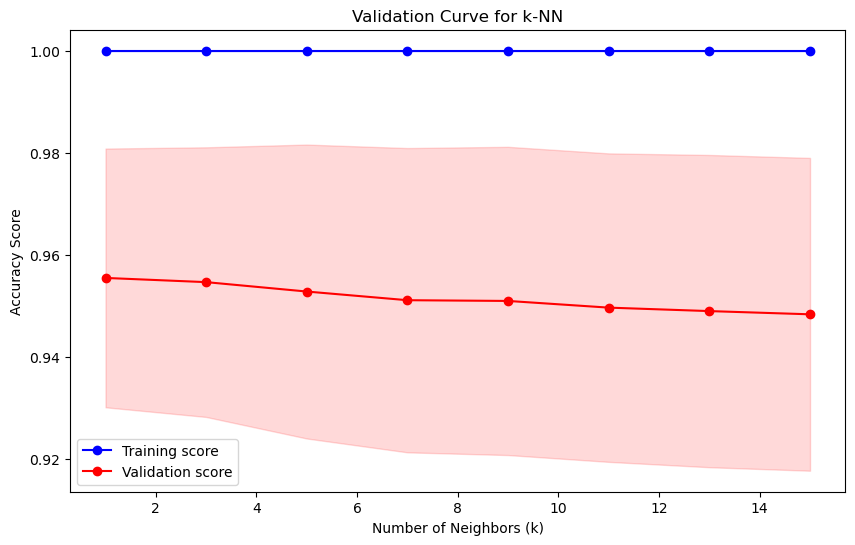

In [154]:
# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, label='Validation score', color='red', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.title('Validation Curve for k-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

In [175]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_validation)

accuracy = accuracy_score(y_validaation, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9583131362094037


In [180]:
knn2 = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn2.fit(X_train, y_train)

y_pred = knn.predict(X_validation)

accuracy = accuracy_score(y_validaation, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9583131362094037


Now, to improve the accuracy of Random Forest Classifier we extracted the feature called Gabor Kernel and then applied the model and we got the 96.21% accuracy.

#### Gabor Kernel Feature

In [181]:
def load_data(data_dir):
    features = []
    labels = []
    for folder in os.listdir(data_dir):
        label = folder
        folder_path = os.path.join(data_dir, folder)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                resized_image = cv2.resize(image, (64, 64))

                k_size = 5
                sigma = 3
                theta = 1*np.pi/4
                lemda = 1*np.pi/4
                gamma = 0.5
                phi = 0

                kernel = cv2.getGaborKernel((k_size,k_size), sigma, theta, lemda, phi, ktype = cv2.CV_32F)

                img3 = cv2.filter2D(resized_image, cv2.CV_8UC3, kernel)
                img4 = img3.reshape(-1)

                # Append features and labels
                features.append(img4)
                labels.append(folder)

            else:
                print(f"Error: Image {image_path} not loaded.")
    return features, labels

# Load training and testing data
training_data_dir = 'E:/IIIT Delhi/ML/Project/data/training_data/'
testing_data_dir = 'E:/IIIT Delhi/ML/Project/data/testing_data/'
train_images_gabor, train_labels_gabor = load_data(training_data_dir)
test_images_gabor, test_labels_gabor = load_data(testing_data_dir)

In [182]:
X_gabor = np.array(train_images)
y_gabor = np.array(train_labels)
X_test_gabor = np.array(test_images)
y_test_gabor = np.array(test_labels)

X_train_gabor, X_validation_gabor, y_train_gabor, y_validaation_gabor = train_test_split(X_gabor, y_gabor, test_size=0.1, random_state=42)

In [183]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_gabor, y_train_gabor)

RandomForestClassifier(random_state=42)

In [184]:
y_pred = clf.predict(X_validation_gabor)

accuracy = accuracy_score(y_validaation_gabor, y_pred)
print(f"Validation data Accuracy: {accuracy}")

Validation data Accuracy: 0.9621909840038778


In [185]:
# For test dataset

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test dataset Accuracy: {accuracy}")

Test dataset Accuracy: 0.9621909840038778


Now, again to improve the accuracy we have extracted two features called HOG Feature and Gabor Kernel and then after appending then we again apply the Random Forest Classifier on the data and got the accuracy of 98.71%.

#### Random Forest with hog features and gabor kernel features

In [187]:
def load_data(data_dir):
    features = []
    labels = []
    image_files = []
    for folder in os.listdir(data_dir):
        label = folder
        folder_path = os.path.join(data_dir, folder)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image_files.append(image_path)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                resized_image = cv2.resize(image, (64, 64))
                
                hog_features = hog(resized_image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))

                k_size = 5
                sigma = 3
                theta = 1*np.pi/4
                lemda = 1*np.pi/4
                gamma = 0.5
                phi = 0

                kernel = cv2.getGaborKernel((k_size,k_size), sigma, theta, lemda, phi, ktype = cv2.CV_32F)

                img2 = cv2.filter2D(resized_image, cv2.CV_8UC3, kernel)
                img3 = img2.reshape(-1)
                
                concatenated_array = np.concatenate((hog_features, img3), axis=0)
                
                # Append features and labels
                features.append(concatenated_array)
                labels.append(folder)

            else:
                print(f"Error: Image {image_path} not loaded.")
    return features, labels, image_files

# Load training and testing data
training_data_dir = 'E:/IIIT Delhi/ML/Project/data/training_data/'
testing_data_dir = 'E:/IIIT Delhi/ML/Project/data/testing_data/'
train_images_hg, train_labels_hg, train_files_hg = load_data(training_data_dir)
test_images_hg, test_labels_hg, test_files_hg = load_data(testing_data_dir)

In [188]:
X_hg = np.array(train_images_hg)
y_hg = np.array(train_labels_hg)
X_test = np.array(test_images_hg)
y_test = np.array(test_labels_hg)

X_train_hg, X_validation_hg, y_train_hg, y_validaation_hg = train_test_split(X_hg, y_hg, test_size=0.1, random_state=42)

In [194]:
RDFclf = RandomForestClassifier(n_estimators=100, random_state=42)
RDFclf.fit(X_train_hg, y_train_hg)

RandomForestClassifier(random_state=42)

In [195]:
y_pred = RDFclf.predict(X_validation_hg)

accuracy = accuracy_score(y_validaation_hg, y_pred)
print(f"Validation set Accuracy: {accuracy}")

Validation set Accuracy: 0.9578284052350945


In [197]:
y_pred = RDFclf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Dataset Accuracy: {accuracy}")

Test Dataset Accuracy: 0.9871031746031746


#### Script for Random Forest Classifier 

In [204]:
def load_data_for_test(data_dir):
    features = []
    labels = []
    image_files = []
    for filename in os.listdir(data_dir):
        image_path = os.path.join(data_dir, filename)
        image_files.append(image_path)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            resized_image = cv2.resize(image, (64, 64))

            hog_features = hog(resized_image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))

            k_size = 5
            sigma = 3
            theta = 1*np.pi/4
            lemda = 1*np.pi/4
            gamma = 0.5
            phi = 0

            kernel = cv2.getGaborKernel((k_size,k_size), sigma, theta, lemda, phi, ktype = cv2.CV_32F)

            img2 = cv2.filter2D(resized_image, cv2.CV_8UC3, kernel)
            img3 = img2.reshape(-1)

            concatenated_array = np.concatenate((hog_features, img3), axis=0)

            # Append features and labels
            features.append(concatenated_array)

        else:
            print(f"Error: Image {image_path} not loaded.")
    return features, labels, image_files

with open("Text.txt", "r") as file:
    testing_data_dir = file.read()

# testing_data_dir = ['E:/IIIT Delhi/ML/Project/data/testing_data/0/','E:/IIIT Delhi/ML/Project/data/testing_data/9/','E:/IIIT Delhi/ML/Project/data/testing_data/J/','E:/IIIT Delhi/ML/Project/data/testing_data/O/']
test_images, test_labels, test_files = load_data_for_test(testing_data_dir)

X_test = np.array(test_images)
y_test = np.array(test_labels)

y_pred = RDFclf.predict(X_test)

for i in range(len(test_files)):
    print(test_files[i],y_pred[i])

E:/IIIT Delhi/ML/Project/data/testing_data/0/28310.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28346.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28382.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28418.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28454.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28490.png O
E:/IIIT Delhi/ML/Project/data/testing_data/0/28526.png O
E:/IIIT Delhi/ML/Project/data/testing_data/0/28562.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28598.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28634.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28670.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28706.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28742.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28778.png O
E:/IIIT Delhi/ML/Project/data/testing_data/0/28814.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28850.png 0
E:/IIIT Delhi/ML/Project/data/testing_data/0/28886.png 0
E:/IIIT Delhi/ML/Project/data/t